<a href="https://colab.research.google.com/github/hangjoni/ai-notebooks/blob/main/Dreambooth_inference_with_cat_toy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qqq diffusers==0.4.1 transformers gradio ftfy 

     |████████████████████████████████| 229 kB 36.6 MB/s 
     |████████████████████████████████| 5.5 MB 43.7 MB/s 
     |████████████████████████████████| 11.6 MB 56.6 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 163 kB 73.8 MB/s 
     |████████████████████████████████| 7.6 MB 43.2 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 212 kB 69.3 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 2.3 MB 51.5 MB/s 
     |████████████████████████████████| 272 kB 71.1 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 106 kB 55.4 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |███████████████████████

In [ ]:
import diffusers
from PIL import Image

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
from huggingface_hub import notebook_login
!git config --global credential.helper store
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
from torch import autocast
from diffusers import StableDiffusionPipeline
import torch


model_id = "sd-dreambooth-library/cat-toy" #@param {type:"string"}
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/589 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/805 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/597 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

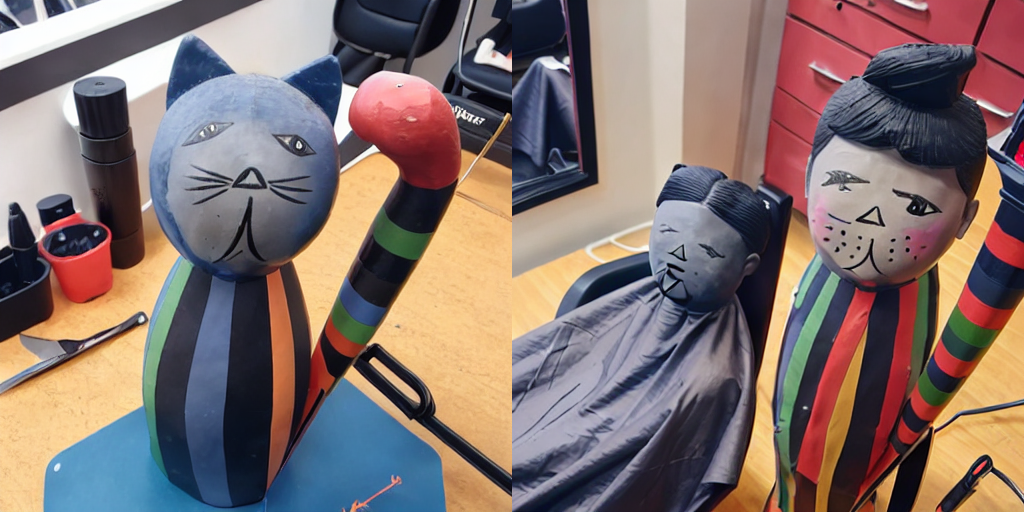

In [ ]:
#@title Run the Stable Diffusion pipeline on Colab
#@markdown Don't forget to use the `sks` token in your prompt

from torch import autocast
prompt = "a photo of sks toy getting a haircut" #@param {type:"string"}

num_samples = 1 #@param {type:"number"}
num_rows = 2 #@param {type:"number"}


all_images = [] 
for _ in range(num_rows):
    p = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5)
    images = p.images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

In [ ]:
! pip freeze | grep torch


torch @ https://download.pytorch.org/whl/cu113/torch-1.12.1%2Bcu113-cp37-cp37m-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu113/torchaudio-0.12.1%2Bcu113-cp37-cp37m-linux_x86_64.whl
torchsummary==1.5.1
torchtext==0.13.1
torchvision @ https://download.pytorch.org/whl/cu113/torchvision-0.13.1%2Bcu113-cp37-cp37m-linux_x86_64.whl
